In [1]:
import math
import json
import random
import ast
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
random.seed(1)
weather_data = pd.read_csv("/Users/ryanlee/Desktop/EarthCam_Assignment/EarthCam_DataScience_Data.csv")

In [3]:
rows = len(weather_data.axes[0])
cols = len(weather_data.axes[1])
print(f"Number of rows: {rows}, Number of columns: {cols}")

Number of rows: 7324, Number of columns: 27


In [4]:
weather_data.iloc[0:10, 0:10]

,ObservedAt,ObservedAt_DateTime,Station,Record,ID,datetime,Temperature,Dewpoint,FeelsLike,HeatIndex
0,1525172100,5/1/2018 5:55,KJOT,011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK ...,220160752,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}"
1,1525193700,5/1/2018 11:55,KJOT,011655Z AUTO 23013G23KT 10SM SCT065 27/11 A299...,220215015,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}"
2,1525215300,5/1/2018 17:55,KJOT,012255Z AUTO 19012G20KT 10SM CLR 28/09 A2991 R...,220262557,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}"
3,1525236900,5/1/2018 23:55,KJOT,020455Z AUTO 20013G18KT 10SM CLR 23/11 A2994 R...,220311850,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}"
4,1525258500,5/2/2018 5:55,KJOT,021055Z AUTO 21008KT 10SM CLR 21/11 A2991 RMK ...,220363232,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': None, 'Celsius': None}"
5,1525280100,5/2/2018 11:55,KJOT,021655Z AUTO 24012G21KT 10SM CLR 28/12 A2994 R...,220415815,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 54, 'Celsius': 12}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}"
6,1525301700,5/2/2018 17:55,KJOT,022255Z AUTO 00000KT 10SM VCTS CLR 26/18 A2987...,220466122,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 79, 'Celsius': 26}","{'Fahrenheit': 64, 'Celsius': 18}","{'Type': None, 'Fahrenheit': 79, 'Celsius': 26}","{'Fahrenheit': None, 'Celsius': None}"
7,1525323300,5/2/2018 23:55,KJOT,030455Z AUTO 28014G22KT 10SM SCT030 SCT038 BKN...,220515926,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 75, 'Celsius': 24}","{'Fahrenheit': 64, 'Celsius': 18}","{'Type': None, 'Fahrenheit': 75, 'Celsius': 24}","{'Fahrenheit': None, 'Celsius': None}"
8,1525344900,5/3/2018 5:55,KJOT,031055Z AUTO 26004KT 7SM SCT006 SCT060 OVC110 ...,220567928,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 64, 'Celsius': 18}","{'Fahrenheit': 64, 'Celsius': 18}","{'Type': None, 'Fahrenheit': 64, 'Celsius': 18}","{'Fahrenheit': None, 'Celsius': None}"
9,1525366500,5/3/2018 11:55,KJOT,031655Z AUTO 22007KT 10SM OVC020 23/19 A2994 R...,220621292,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 66, 'Celsius': 19}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}"


In [5]:
weather_data.iloc[0:10, 10:20]

,Windchill,Pressure,Precipitation,Wind,RelativeHumidity,CurrentConditions,CurrentConditionsAbbreviation,ConditionType,CloudCondition,CloudReport
0,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.92, 'InchesOfMercury': 30}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.509,Clear Skies,NaN,Clear,Clear Skies,Clear Skies
1,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.58, 'InchesOfMercury': 29.99}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 230, 'Direction': 'So...",0.368,Scattered,NaN,Cloudy,Scattered,Scattered
2,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.303,Clear Skies,NaN,Clear,Clear Skies,Clear Skies
3,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 200, 'Direction': 'So...",0.468,Clear Skies,NaN,Clear,Clear Skies,Clear Skies
4,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 210, 'Direction': 'So...",0.530,Clear Skies,NaN,Clear,Clear Skies,Clear Skies
5,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 240, 'Direction': 'We...",0.371,Clear Skies,NaN,Clear,Clear Skies,Clear Skies
6,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1011.52, 'InchesOfMercury': 29.87}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 0, 'Direction': 'Nort...",0.614,"In The Vicinity, Thunderstorms",VCTS,Clear,"In The Vicinity, Thunderstorms / Clear Skies",Clear Skies
7,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 280, 'Direction': 'We...",0.692,Scattered,NaN,Cloudy,Scattered / Broken Sky,Scattered / Broken Sky
8,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.19, 'InchesOfMercury': 29.89}","{'Hour': {'In': 0.24, 'Cm': 0.61}, 'Snow': {'I...","{'Direction': {'Degree': 260, 'Direction': 'We...",1.000,Scattered,NaN,Cloudy,Scattered / Overcast Sky,Scattered / Overcast Sky
9,"{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 220, 'Direction': 'So...",0.783,Overcast Sky,NaN,Cloudy,Overcast Sky,Overcast Sky


In [6]:
weather_data.iloc[0:10, 20:27]

,Visibility,Clouds,Lightning,SunInfo,MoonInfo,raw,daily_total_precipitation
0,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T013...,NaN
1,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",AUTO 23013G23KT 10SM SCT065 27/11 A2999 RMK AO...,NaN
2,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",AUTO 19012G20KT 10SM CLR 28/09 A2991 RMK AO2 T...,NaN
3,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': False, 'Sunrise': {'timezone': 'Am...","{'Phase': 0.5703094498618421, 'PhaseName': 'Wa...",AUTO 20013G18KT 10SM CLR 23/11 A2994 RMK AO2 T...,NaN
4,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5782024918339819, 'PhaseName': 'Wa...",AUTO 21008KT 10SM CLR 21/11 A2991 RMK AO2 T020...,NaN
5,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5860570630481361, 'PhaseName': 'Wa...",AUTO 24012G21KT 10SM CLR 28/12 A2994 RMK AO2 T...,NaN
6,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5938746279225205, 'PhaseName': 'Wa...",AUTO 00000KT 10SM VCTS CLR 26/18 A2987 RMK AO2...,NaN
7,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': False, 'Sunrise': {'timezone': 'Am...","{'Phase': 0.6016568066351913, 'PhaseName': 'Wa...",AUTO 28014G22KT 10SM SCT030 SCT038 BKN070 24/1...,NaN
8,"[{'Miles': 7, 'Kilometers': 11.3, 'Direction':...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.6094053706053484, 'PhaseName': 'Wa...",AUTO 26004KT 7SM SCT006 SCT060 OVC110 18/18 A2...,NaN
9,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Overcast Sky', 'Coverage': '8/...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.6171222380930323, 'PhaseName': 'Wa...",AUTO 22007KT 10SM OVC020 23/19 A2994 RMK AO2 T...,NaN


In [7]:
format_data = "%m/%d/%Y %H:%M"
all_dates = weather_data["ObservedAt_DateTime"]
len_date = len(weather_data["ObservedAt_DateTime"])
dic_dates = {}
for index in range(len_date):
    cur_date = datetime.strptime(all_dates[index], format_data)
    cur_date = (cur_date.month,cur_date.day)
    if cur_date not in dic_dates:
        dic_dates[cur_date]=0
    else:
        dic_dates[cur_date]+=1
        
dic_dates = dict(sorted(dic_dates.items()))
x = list(dic_dates.values())
y = [str(s) for s in dic_dates.keys()]
#cur_date.timetuple().tm_yday
#(cur_date.month,cur_date.day)
#For months between Jan and May (inclusive) the maximum number of times it can be counted in
#Year 5: 24, Year 4: 20, Year 3: 16, Year 2: 12, Year 1: 8 times.
#For months between June and Dec (inclusive) the maximum number of times it can be counted in
#Year 4: 20, Year 3: 16, Year 2: 12, Year 1: 8 times.

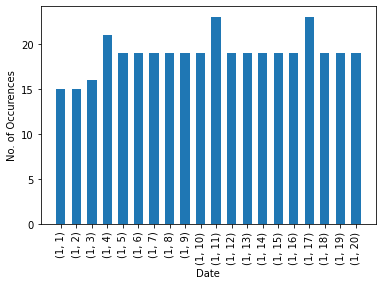

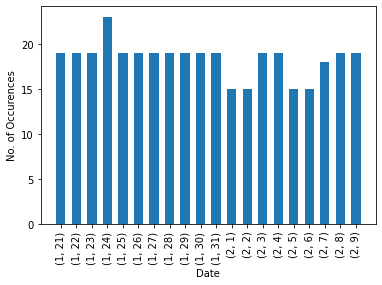

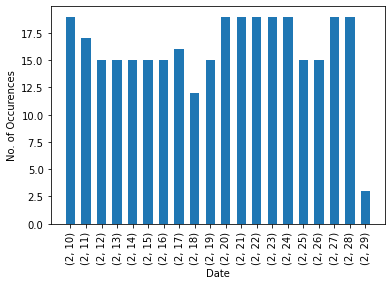

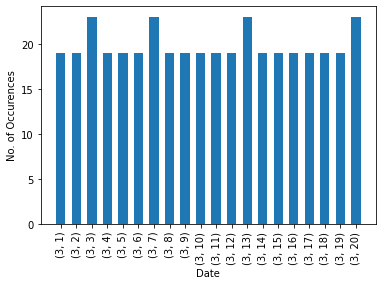

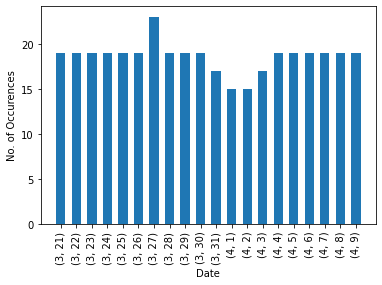

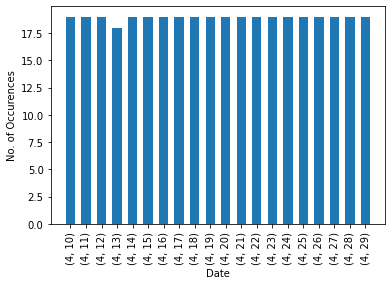

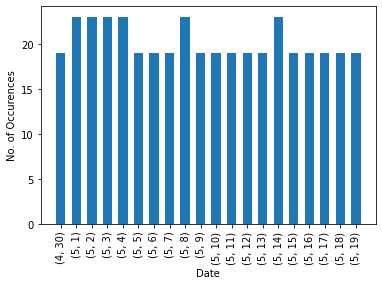

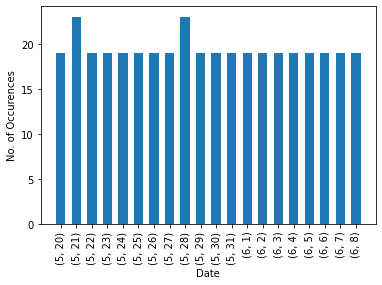

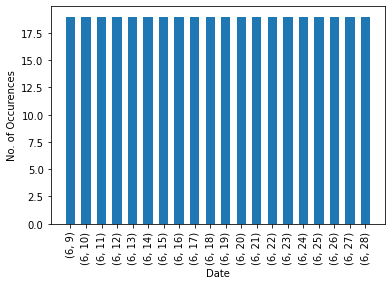

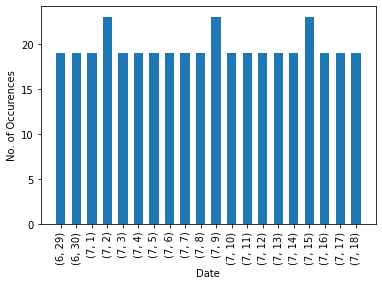

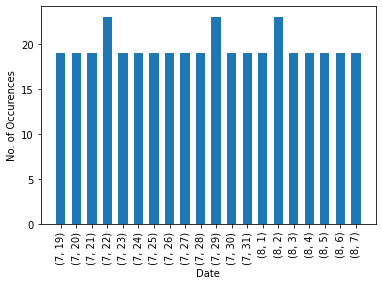

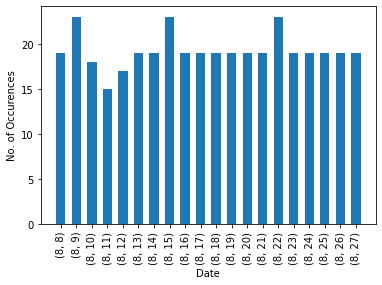

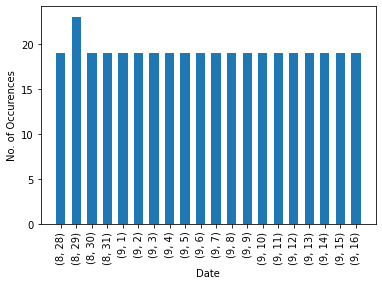

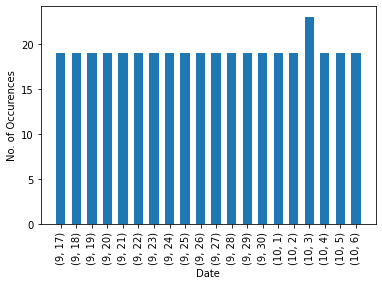

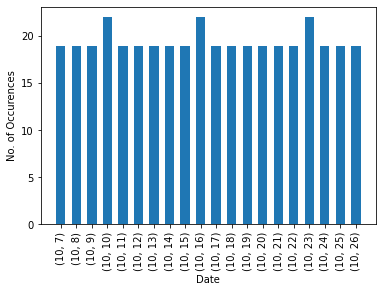

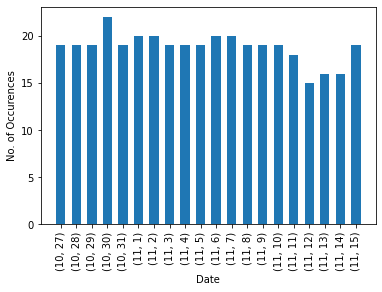

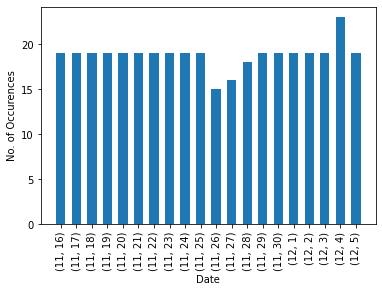

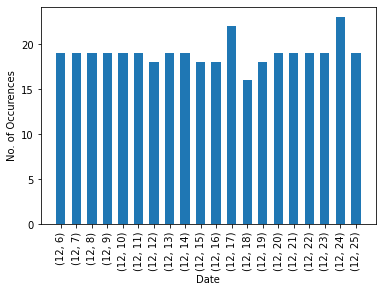

In [8]:
start_index = 0
end_index = 20
while end_index < len(x):
    plt.bar(y[start_index:end_index],x[start_index:end_index],width=0.6)
    plt.xticks(rotation="vertical")
    plt.xlabel("Date")
    plt.ylabel("No. of Occurences")
    plt.show()
    end_index+=20
    start_index+=20

In [9]:
repeats = {}
print("Size before getting rid of duplicates: ",len(weather_data))
weather_data.drop_duplicates(subset=["ObservedAt_DateTime"],inplace=True)

#Sanity Check
for index in weather_data.index:
    string_date = weather_data["ObservedAt_DateTime"][index]
    if string_date not in repeats:
        repeats[string_date]=0
    else:
        print("Duplicate")
        
print("Size after getting rid of duplicates: ",len(weather_data))

Size before getting rid of duplicates:  7324
Size after getting rid of duplicates:  7217


In [10]:
all_temps = weather_data["Temperature"]
avg_temp = {}
count = {}
format_data = "%m/%d/%Y %H:%M"
for index in weather_data.index:
    cur_date = datetime.strptime(all_dates[index], format_data)
    cur_year = cur_date.year
    cur_day = cur_date.timetuple().tm_yday
    cur_temp = ast.literal_eval(all_temps[index])
    cur_temp = cur_temp["Fahrenheit"]
    if cur_year not in avg_temp:
        avg_temp[cur_year]={}
        count[cur_year]={}
    if cur_day not in avg_temp[cur_year]:
        avg_temp[cur_year][cur_day]=cur_temp
        count[cur_year][cur_day]=1
    else:
        avg_temp[cur_year][cur_day]+=cur_temp
        count[cur_year][cur_day]+=1

In [11]:
for key1 in avg_temp.keys():
    for key2 in avg_temp[key1].keys():
        avg_temp[key1][key2]/=count[key1][key2]

<AxesSubplot:title={'center':'Avg temp between years and days'}>

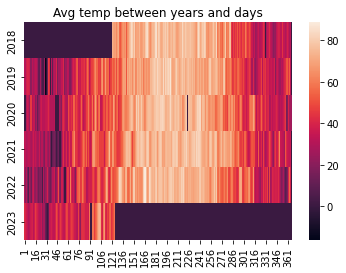

In [12]:
dates_and_temps = []
avg_all_years = []
for year in avg_temp.keys():
    tmp = [0 for i in range(367)]
    for day in avg_temp[year].keys():
        tmp[day]+=avg_temp[year][day]
        dates_and_temps.append((day,avg_temp[year][day]))
    tmp.pop(0)
    avg_all_years.append(tmp)
    
years_labels = [2018,2019,2020,2021,2022,2023]
days_labels = [i for i in range(1,367)]
df = pd.DataFrame(avg_all_years,index=years_labels,columns=days_labels)
plt.title("Avg temp between years and days")
sns.heatmap(df)

In [13]:
random.shuffle(dates_and_temps)
dates = []
temps = []
for dt in dates_and_temps:
    dates.append([dt[0]])
    temps.append(dt[1])

In [14]:
train_size = 0.7
test_size = 0.3
train_len = int(0.7*len(dates))
training_dates = dates[:train_len]
training_temps = temps[:train_len]
testing_dates = dates[train_len:]
testing_temps = temps[train_len:]

In [15]:
model = xgb.XGBRegressor(max_depth=1000,
    n_estimators=2000,
    min_child_weight=200, 
    colsample_bytree=1, 
    subsample=1, 
    eta=0.05,    
    seed=9)
model.fit(training_dates,training_temps)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1000, max_leaves=0,
             min_child_weight=200, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [16]:
prediction= model.predict(testing_dates)
print("RMSE of model",mean_squared_error(testing_temps,prediction)**(1/2.0))

RMSE of model 8.286116120907812
